In [1]:
!pip install seaborn --upgrade

# *Import Libaries*

In [2]:
import seaborn as sns
print(sns.__version__)


0.13.2


In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks
from matplotlib.pyplot import yticks

In [5]:
df = pd.DataFrame(pd.read_csv("insurance.csv"))
df

age     sex   bmi  children smoker     region  expenses
0      19  female  27.9         0    yes  southwest  16884.92
1      18    male  33.8         1     no  southeast   1725.55
2      28    male  33.0         3     no  southeast   4449.46
3      33    male  22.7         0     no  northwest  21984.47
4      32    male  28.9         0     no  northwest   3866.86
...   ...     ...   ...       ...    ...        ...       ...
1333   50    male  31.0         3     no  northwest  10600.55
1334   18  female  31.9         0     no  northeast   2205.98
1335   18  female  36.9         0     no  southeast   1629.83
1336   21  female  25.8         0     no  southwest   2007.95
1337   61  female  29.1         0    yes  northwest  29141.36

[1338 rows x 7 columns]

# *Data Preprocessing/ Cleaning*

In [6]:
row,col = df.shape
print("No of rows = ",row)
print("No of cols = ",col)

No of rows =  1338
No of cols =  7


In [7]:
df.describe()

age          bmi     children      expenses
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.665471     1.094918  13270.422414
std      14.049960     6.098382     1.205493  12110.011240
min      18.000000    16.000000     0.000000   1121.870000
25%      27.000000    26.300000     0.000000   4740.287500
50%      39.000000    30.400000     1.000000   9382.030000
75%      51.000000    34.700000     2.000000  16639.915000
max      64.000000    53.100000     5.000000  63770.430000

In [8]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [9]:
#df = df.dropna() used to remove empty cells

In [10]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [11]:
df.shape

(1338, 7)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [13]:
df['sex'] = df['sex'].astype('category')
df['smoker'] = df['smoker'].astype('category')
df['region']= df['region'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   expenses  1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


In [14]:
# # Checking Null values
# df.isnull().sum()
# # There are no NULL values in the dataset, hence it is clean.

In [15]:
print(len(set(df['sex'])))
print(len(set(df['smoker'])))
print(len(set(df['region'])))

2
2
4


In [16]:
# df = df.dropna()

# *Exploratory Data Analysis*

In [17]:
auto=df[['age','bmi','children','expenses','sex','smoker','region']]


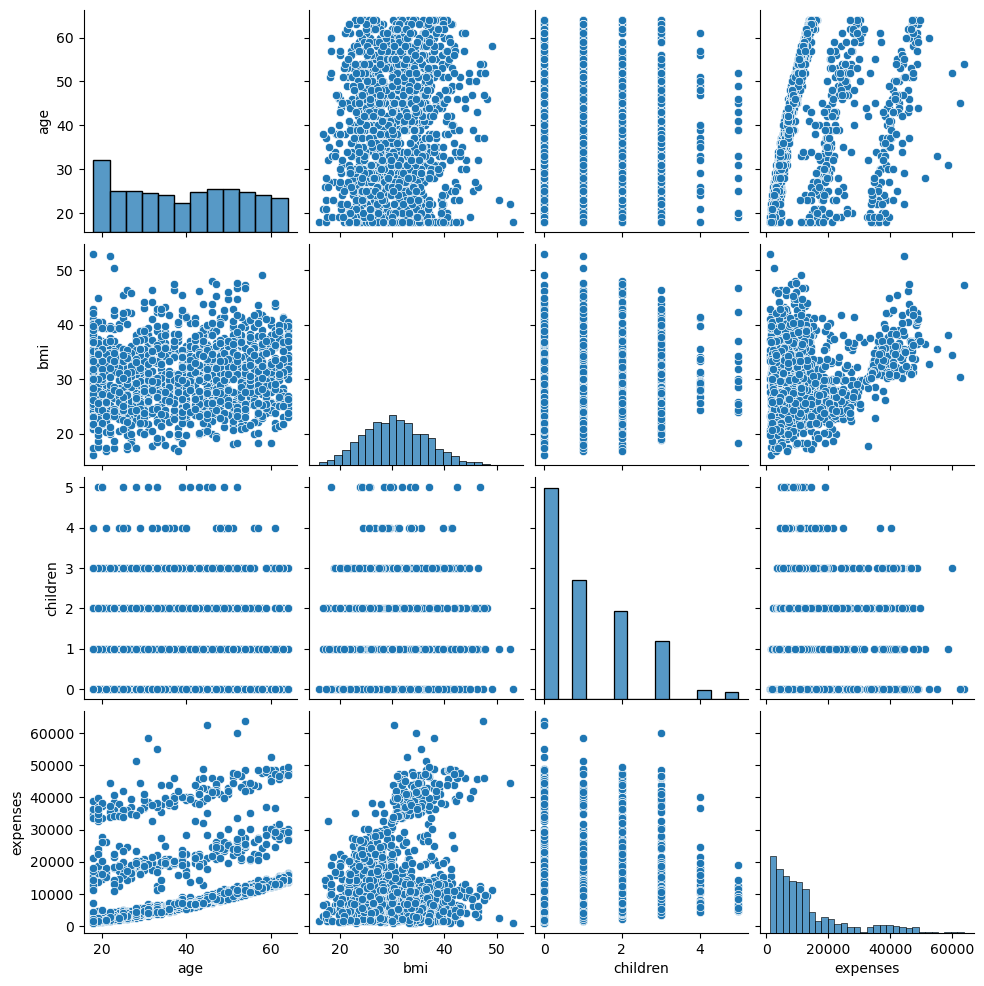

In [18]:
sns.pairplot(auto) #only takes numerical value

In [19]:
auto1=df[['age','bmi','children','expenses']]
auto1.corr()

age       bmi  children  expenses
age       1.000000  0.109341  0.042469  0.299008
bmi       0.109341  1.000000  0.012645  0.198576
children  0.042469  0.012645  1.000000  0.067998
expenses  0.299008  0.198576  0.067998  1.000000

In [20]:
#auto=df[['age','bmi','children','expenses']]

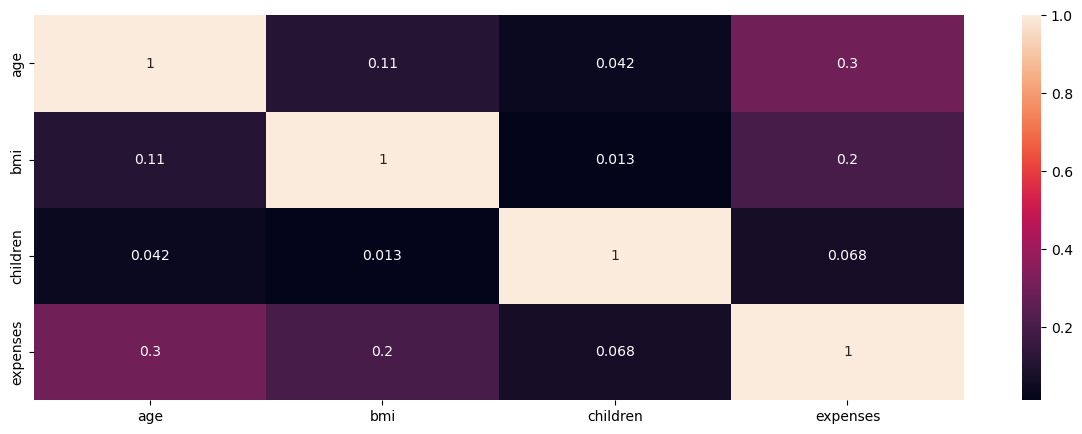

In [21]:
# Starting machine learning
import seaborn as sns
plt.figure(figsize=(15,5))
sns.heatmap(auto1.corr(), annot = True)
plt.show()

In [22]:
auto

age   bmi  children  expenses     sex smoker     region
0      19  27.9         0  16884.92  female    yes  southwest
1      18  33.8         1   1725.55    male     no  southeast
2      28  33.0         3   4449.46    male     no  southeast
3      33  22.7         0  21984.47    male     no  northwest
4      32  28.9         0   3866.86    male     no  northwest
...   ...   ...       ...       ...     ...    ...        ...
1333   50  31.0         3  10600.55    male     no  northwest
1334   18  31.9         0   2205.98  female     no  northeast
1335   18  36.9         0   1629.83  female     no  southeast
1336   21  25.8         0   2007.95  female     no  southwest
1337   61  29.1         0  29141.36  female    yes  northwest

[1338 rows x 7 columns]

In [23]:
# Dimension reduction

In [24]:
sex = pd.get_dummies(auto['sex'], drop_first = True)
sex

male
0     False
1      True
2      True
3      True
4      True
...     ...
1333   True
1334  False
1335  False
1336  False
1337  False

[1338 rows x 1 columns]

In [25]:
auto = pd.concat([auto, sex], axis = 1)
auto

age   bmi  children  expenses     sex smoker     region   male
0      19  27.9         0  16884.92  female    yes  southwest  False
1      18  33.8         1   1725.55    male     no  southeast   True
2      28  33.0         3   4449.46    male     no  southeast   True
3      33  22.7         0  21984.47    male     no  northwest   True
4      32  28.9         0   3866.86    male     no  northwest   True
...   ...   ...       ...       ...     ...    ...        ...    ...
1333   50  31.0         3  10600.55    male     no  northwest   True
1334   18  31.9         0   2205.98  female     no  northeast  False
1335   18  36.9         0   1629.83  female     no  southeast  False
1336   21  25.8         0   2007.95  female     no  southwest  False
1337   61  29.1         0  29141.36  female    yes  northwest  False

[1338 rows x 8 columns]

In [26]:
smoker = pd.get_dummies(auto['smoker'], drop_first = True)
smoker

yes
0      True
1     False
2     False
3     False
4     False
...     ...
1333  False
1334  False
1335  False
1336  False
1337   True

[1338 rows x 1 columns]

In [27]:
region = pd.get_dummies(auto['region'])
region

northeast  northwest  southeast  southwest
0         False      False      False       True
1         False      False       True      False
2         False      False       True      False
3         False       True      False      False
4         False       True      False      False
...         ...        ...        ...        ...
1333      False       True      False      False
1334       True      False      False      False
1335      False      False       True      False
1336      False      False      False       True
1337      False       True      False      False

[1338 rows x 4 columns]

In [28]:
auto

age   bmi  children  expenses     sex smoker     region   male
0      19  27.9         0  16884.92  female    yes  southwest  False
1      18  33.8         1   1725.55    male     no  southeast   True
2      28  33.0         3   4449.46    male     no  southeast   True
3      33  22.7         0  21984.47    male     no  northwest   True
4      32  28.9         0   3866.86    male     no  northwest   True
...   ...   ...       ...       ...     ...    ...        ...    ...
1333   50  31.0         3  10600.55    male     no  northwest   True
1334   18  31.9         0   2205.98  female     no  northeast  False
1335   18  36.9         0   1629.83  female     no  southeast  False
1336   21  25.8         0   2007.95  female     no  southwest  False
1337   61  29.1         0  29141.36  female    yes  northwest  False

[1338 rows x 8 columns]

In [29]:
auto = pd.concat([auto, region], axis = 1)
auto

age   bmi  children  expenses     sex smoker     region   male  \
0      19  27.9         0  16884.92  female    yes  southwest  False   
1      18  33.8         1   1725.55    male     no  southeast   True   
2      28  33.0         3   4449.46    male     no  southeast   True   
3      33  22.7         0  21984.47    male     no  northwest   True   
4      32  28.9         0   3866.86    male     no  northwest   True   
...   ...   ...       ...       ...     ...    ...        ...    ...   
1333   50  31.0         3  10600.55    male     no  northwest   True   
1334   18  31.9         0   2205.98  female     no  northeast  False   
1335   18  36.9         0   1629.83  female     no  southeast  False   
1336   21  25.8         0   2007.95  female     no  southwest  False   
1337   61  29.1         0  29141.36  female    yes  northwest  False   

      northeast  northwest  southeast  southwest  
0         False      False      False       True  
1         False      False       True      False  
2         False      False       True      False  
3         False       True      False      False  
4         False       True      False      False  
...         ...        ...        ...        ...  
1333      False       True      False      False  
1334       True      False      False      False  
1335      False      False       True      False  
1336      False      False      False       True  
1337      False       True      False      False  

[1338 rows x 12 columns]

In [30]:
#auto=df[['age','bmi','children','expenses','sex','smoker','region']]

In [31]:
auto = auto.drop(['region'],axis = 1)
auto

age   bmi  children  expenses     sex smoker   male  northeast  \
0      19  27.9         0  16884.92  female    yes  False      False   
1      18  33.8         1   1725.55    male     no   True      False   
2      28  33.0         3   4449.46    male     no   True      False   
3      33  22.7         0  21984.47    male     no   True      False   
4      32  28.9         0   3866.86    male     no   True      False   
...   ...   ...       ...       ...     ...    ...    ...        ...   
1333   50  31.0         3  10600.55    male     no   True      False   
1334   18  31.9         0   2205.98  female     no  False       True   
1335   18  36.9         0   1629.83  female     no  False      False   
1336   21  25.8         0   2007.95  female     no  False      False   
1337   61  29.1         0  29141.36  female    yes  False      False   

      northwest  southeast  southwest  
0         False      False       True  
1         False       True      False  
2         False       True      False  
3          True      False      False  
4          True      False      False  
...         ...        ...        ...  
1333       True      False      False  
1334      False      False      False  
1335      False       True      False  
1336      False      False       True  
1337       True      False      False  

[1338 rows x 11 columns]

In [32]:
import pandas as pd

# Convert categorical columns to numeric
auto['sex'] = auto['sex'].map({'male': 1, 'female': 0})
auto['smoker'] = auto['smoker'].map({'yes': 1, 'no': 0})

# Now calculate the correlation matrix
correlation_matrix = auto.corr()

# Display the correlation matrix
print(correlation_matrix)


                age       bmi  children  expenses       sex    smoker  \
age        1.000000  0.109341  0.042469  0.299008 -0.020856 -0.025019   
bmi        0.109341  1.000000  0.012645  0.198576  0.046380  0.003968   
children   0.042469  0.012645  1.000000  0.067998  0.017163  0.007673   
expenses   0.299008  0.198576  0.067998  1.000000  0.057292  0.787251   
sex       -0.020856  0.046380  0.017163  0.057292  1.000000  0.076185   
smoker    -0.025019  0.003968  0.007673  0.787251  0.076185  1.000000   
male      -0.020856  0.046380  0.017163  0.057292  1.000000  0.076185   
northeast  0.002475 -0.138091 -0.022808  0.006349 -0.002425  0.002811   
northwest -0.000407 -0.135992  0.024806 -0.039905 -0.011156 -0.036945   
southeast -0.011642  0.270144 -0.023066  0.073982  0.017117  0.068498   
southwest  0.010016 -0.006398  0.021914 -0.043210 -0.004184 -0.036945   

               male  northeast  northwest  southeast  southwest  
age       -0.020856   0.002475  -0.000407  -0.011642   0.

In [33]:
auto.corr()

age       bmi  children  expenses       sex    smoker  \
age        1.000000  0.109341  0.042469  0.299008 -0.020856 -0.025019   
bmi        0.109341  1.000000  0.012645  0.198576  0.046380  0.003968   
children   0.042469  0.012645  1.000000  0.067998  0.017163  0.007673   
expenses   0.299008  0.198576  0.067998  1.000000  0.057292  0.787251   
sex       -0.020856  0.046380  0.017163  0.057292  1.000000  0.076185   
smoker    -0.025019  0.003968  0.007673  0.787251  0.076185  1.000000   
male      -0.020856  0.046380  0.017163  0.057292  1.000000  0.076185   
northeast  0.002475 -0.138091 -0.022808  0.006349 -0.002425  0.002811   
northwest -0.000407 -0.135992  0.024806 -0.039905 -0.011156 -0.036945   
southeast -0.011642  0.270144 -0.023066  0.073982  0.017117  0.068498   
southwest  0.010016 -0.006398  0.021914 -0.043210 -0.004184 -0.036945   

               male  northeast  northwest  southeast  southwest  
age       -0.020856   0.002475  -0.000407  -0.011642   0.010016  
bmi        0.046380  -0.138091  -0.135992   0.270144  -0.006398  
children   0.017163  -0.022808   0.024806  -0.023066   0.021914  
expenses   0.057292   0.006349  -0.039905   0.073982  -0.043210  
sex        1.000000  -0.002425  -0.011156   0.017117  -0.004184  
smoker     0.076185   0.002811  -0.036945   0.068498  -0.036945  
male       1.000000  -0.002425  -0.011156   0.017117  -0.004184  
northeast -0.002425   1.000000  -0.320177  -0.345561  -0.320177  
northwest -0.011156  -0.320177   1.000000  -0.346265  -0.320829  
southeast  0.017117  -0.345561  -0.346265   1.000000  -0.346265  
southwest -0.004184  -0.320177  -0.320829  -0.346265   1.000000

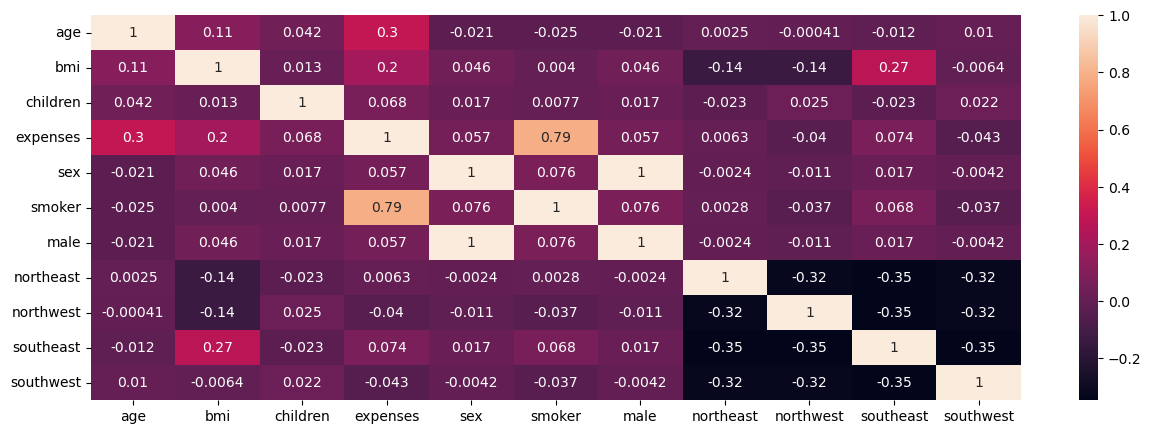

In [34]:
# Starting machine learning
import seaborn as sns
plt.figure(figsize=(15,5))
sns.heatmap(auto.corr(),annot=True)
plt.show()

In [35]:
# auto = auto.drop(['northeast'],axis = 1)
# auto

In [36]:
auto['expenses'] = auto['expenses'].astype('int')

# *Model Building*

In [37]:
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(auto, train_size = 0.85, test_size = 0.15, random_state = 1)

In [38]:
df_train.shape

(1137, 11)

In [39]:
df_test.shape

(201, 11)

In [41]:
from sklearn.linear_model import LinearRegression
X_train = df_train[['age','bmi','children', 'expenses','northeast','northwest','southeast','southwest']]
y_train = df_train['expenses']
# df_test_predict = X_train.iloc[0:1]
# for linear regression
lm = LinearRegression()
lr_model = lm.fit(X_train, y_train)

# # #for logistic regression
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg_model = lg.fit(X_train, y_train)

# # #for polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=7)
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

# # model.predict(df_test_predict)

C:\Users\Acer\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LinearRegression()

# *Model Evaluation*

In [42]:
print("Linear regression = ",lr_model.score(X_train, y_train)*100)
print("Logistic regression = ",lg_model.score(X_train, y_train)*100)
print("Polynomial regression = ",pol_reg.score(poly_reg.fit_transform(X_train), y_train)*100)



Linear regression =  100.0
Logistic regression =  0.6156552330694811
Polynomial regression =  89.08260871668465


In [44]:
#testing
X_test = df_test[['age','bmi','children', 'expenses','northeast','northwest','southeast','southwest']]
y_test = df_test['expenses']
print("Linear regression = ",lr_model.score(X_test, y_test)*100)
print("Logistic regression = ",lg_model.score(X_test, y_test)*100)
print("Polynomial regression = ",pol_reg.score(poly_reg.fit_transform(X_test), y_test)*100)



Linear regression =  100.0
Logistic regression =  0.0
Polynomial regression =  -5916.84653758846


In [ ]:
data = df_test.iloc[3:4]
data = data.drop(['male'], axis= 1)
actual_expenses = data['expenses']
data = data.drop(['expenses'],axis = 1)
data

In [ ]:
X_train

In [ ]:
print("Predicted expenses using linear regression",lr_model.predict(data))
print("Predicted expenses using logistic regression",lg_model.predict(data))
print("Predicted expenses using Polynomial regression",pol_reg.predict(poly_reg.fit_transform(data)))

print("Actual expenses",actual_expenses)

In [ ]:
actual_expenses

In [ ]:
data = {'age':[int(input("Enter age = "))],
        'bmi':[float(input("Enter bmi = "))],
        "children":[int(input("children ? Enter 1 or 0 = "))],
        "yes":[int(input("smoker yes ? Enter 1 or 0 = ")) for i in range(1)],
         "northeast":[int(input("northeast ? Enter 1 or 0 = ")) for i in range(1)],
      "northwest":[int(input("northwest ? Enter 1 or 0 = ")) for i in range(1)],
       "southeast":[int(input("southeast ? Enter 1 or 0 = ")) for i in range(1)],
       "southwest":[int(input("southwest ? Enter 1 or 0 = ")) for i in range(1)]}

df = pd.DataFrame(data)
predicted_expenses = pol_reg.predict(poly_reg.fit_transform(df))
print("predicted expenses",predicted_expenses)
df

In [ ]:
plt.scatter(y_train,lr_model.predict(X_train),color = 'red')
plt.xlabel('Actual expenses')
plt.ylabel('Predicted expenses')
plt.show()

In [ ]:
plt.scatter(y_train,lg_model.predict(X_train),color = 'red')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.show()

In [ ]:
plt.scatter(y_train,pol_reg.predict(poly_reg.fit_transform(X_train)),color = 'red')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.show()

In [ ]:
x = [i for i in range(15)]
plt.scatter(x,x,color = 'red')


In [ ]:
import pickle as pk
#to save model
# filename = 'model.pickle'
# pk.dump(lr_model, open(filename, 'wb')) #to save file we use dump

#loads the model
loaded_model = pk.load(open(filename, 'rb'))

